# Cellphone Service Best Markets

## A. Importing
* Importing necessary libraries

In [199]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import folium
%matplotlib inline

* Import data

In [3]:
data = pd.read_csv('./wdi/Indicators.csv')
data.shape

(5656458, 6)

## B. Data preparation

In [132]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

* List some basic statistics

In [134]:
#check for null values in any cell
data.isnull().any().any()

False

In [245]:
countries = data['CountryName'].unique().tolist()
countryCodes = data['CountryCode'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()
indicator_codes = data['IndicatorCode'].unique().tolist()

In [5]:
print ('Countries:',len(countries),'  Indicators:',len(indicators))

Countries: 247   Indicators: 1344


* Create a data frame for Mobile cellular subscriptions

In [265]:
df_cellfone = data.loc[(data['IndicatorName'] == 'Mobile cellular subscriptions') & (data['Year'] >= 1995)]
df_cellfone = df_cellfone.drop(['IndicatorName', 'IndicatorCode'], axis=1)
df_cellfone.columns = ['CountryName','CountryCode','Year','Cellphone']
df_cellfone.head(3)

,CountryName,CountryCode,Year,Cellphone
2485343,Arab World,ARB,1995,501551.0
2485757,Caribbean small states,CSS,1995,66297.0
2486225,Central Europe and the Baltics,CEB,1995,552442.0


* Create an empty dataframe to collect any feature that correlate well to mobile cellular subscriptions

In [266]:
df_features = pd.DataFrame({'IndicatorCode':['a'],'Correlation':[0.0],'Length':[0]})
df_features


,Correlation,IndicatorCode,Length
0,0.0,a,0


* Loop through the entire dataset and calculate correlation score. Features with correlation score greater or equal to 0.89 will be selected

In [268]:
for f in indicator_codes:
    temp = data.loc[(data['IndicatorCode'] == f) & (data['Year'] >= 1995)]
    temp = temp.drop(['IndicatorName', 'IndicatorCode'], axis=1)
    temp.columns = ['CountryName','CountryCode','Year', f]
    temp = df_cellfone.merge(temp, on=['CountryCode','Year'], how='inner')
    related = temp['Cellphone'].corr(temp[f])
    #print("%s: %f" % (f,related))
    if (related >= 0.85):
        df_features.loc[-1] = [related,f,len(temp)]
        df_features.index = df_features.index + 1
        df_features = df_features.sort_index()
df_features.shape

(58, 3)

* Expand the df_features and in this case, we just add one more column - the "Indicator Name"

In [269]:
df_indicators = pd.DataFrame([indicators,indicator_codes])
df_indicators = df_indicators.transpose()
df_indicators.columns = ['Indicator Names', 'IndicatorCode']
df_features = df_features.merge(df_indicators, on=['IndicatorCode'])

* Here the features will be displayed. Note that while some correlation scores are high, they have very low "Length" values which indicates lesser confidence when compared to entries with same Correlation scores but with higher Length.

In [271]:

df_features_filtered = df_features.sort_values(by=['Correlation'])
df_features_filtered.tail(10)

,Correlation,IndicatorCode,Length,Indicator Names
41,0.921564,DT.DOD.PRVS.CD,2559,"External debt stocks, long-term private sector..."
33,0.922053,DT.NFL.DECT.CD,2559,"Net flows on external debt, total (NFL, curren..."
39,0.923879,DT.DOD.DSTC.CD,2559,"External debt stocks, short-term (DOD, current..."
28,0.924596,DT.DOD.PNGC.CD,2559,"PNG, commercial banks and other creditors (DOD..."
50,0.932751,BX.TRF.PWKR.CD.DT,3793,"Personal remittances, received (current US$)"
54,0.944459,NV.AGR.TOTL.CD,4128,"Agriculture, value added (current US$)"
3,0.948240,BX.TRF.PWKR.CD,1583,"Personal transfers, receipts (BoP, current US$)"
0,0.955018,DT.DOD.PVLX.CD,117,Present value of external debt (current US$)
51,0.973193,ER.H2O.FWTL.K3,545,"Annual freshwater withdrawals, total (billion ..."
56,1.000000,IT.CEL.SETS,4683,Mobile cellular subscriptions


## C. DATA EXPLORATION

### Top 10 features based on both correlation and length (unverified)
* Agriculture, value added  : NV.AGR.TOTL.CD	
* Personal remittances, received  : BX.TRF.PWKR.CD.DT
* Net flows on external debt, total : DT.NFL.DECT.CD
* Container port traffic : IS.SHP.GOOD.TU	
* Trademark applications, direct resident : IP.TMK.RESD	
* Primary income on FDI, payments : BX.KLT.DREM.CD.DT	
* HFC gas emissions (thousand metric tons of CO2) : EN.ATM.HFCG.KT.CE	
* Fixed broadband subscriptions : IT.NET.BBND	
* Grants, excluding technical cooperation  : BX.GRT.EXTA.CD.WD
* GDP, PPP : NY.GDP.MKTP.PP.CD	

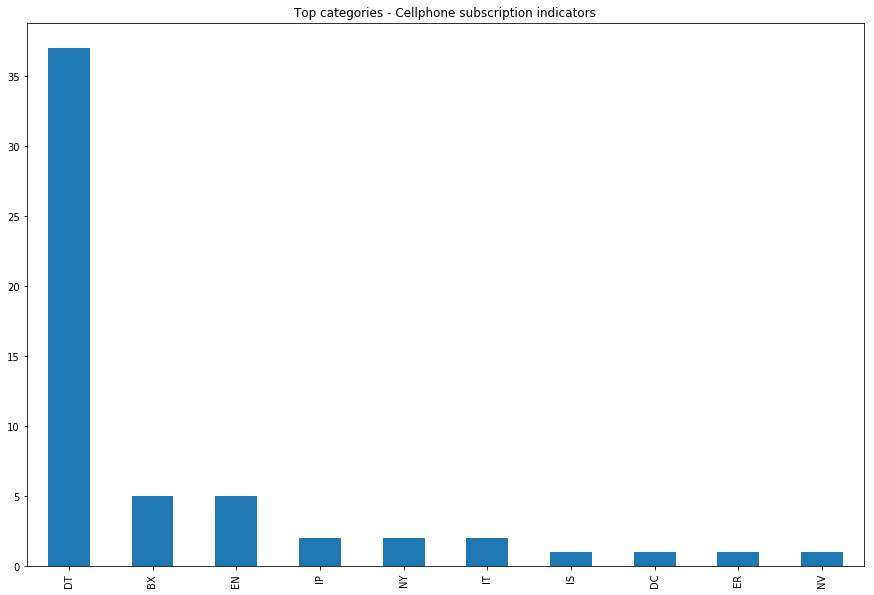

In [272]:
df_features_codeCount = df_features['IndicatorCode'].str.split('.', expand=True)
df_features_codeCount.drop(df_features_codeCount.index[1:6], axis = 1, inplace=True)
df_features_codeCount = df_features_codeCount[df_features_codeCount.index[0]].value_counts()
df_features_codeCount.plot(kind='bar', figsize=(15,10), title='Top categories - Cellphone subscription indicators')
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [277]:
featured_codes=['NV.AGR.TOTL.CD','BX.TRF.PWKR.CD.DT','DT.NFL.DECT.CD','IS.SHP.GOOD.TU','IP.TMK.RESD','BX.KLT.DREM.CD.DT','EN.ATM.HFCG.KT.CE','IT.NET.BBND','BX.GRT.EXTA.CD.WD','NY.GDP.MKTP.PP.CD']
df_features_combined = df_cellfone
#df_features_combined.head(5)

In [278]:
for f in featured_codes:
    temp = data.loc[(data['IndicatorCode'] == f) & (data['Year'] >= 1995)]
    temp = temp.drop(['IndicatorName', 'IndicatorCode'], axis=1)
    temp.columns = ['CountryName','CountryCode','Year', f]
    df_features_combined = df_features_combined.merge(temp, on=['CountryName','CountryCode','Year'], how='inner')
    #get the relationship of each indicator with "Cellphone"
    df_features_combined[f] = df_features_combined[f]/df_features_combined['Cellphone']
#drop "Cellphone" out of the df
df_features_combined = df_features_combined.drop('Cellphone', axis=1)
df_features_combined.head(10)

,CountryName,CountryCode,Year,NV.AGR.TOTL.CD,BX.TRF.PWKR.CD.DT,DT.NFL.DECT.CD,IS.SHP.GOOD.TU,IP.TMK.RESD,BX.KLT.DREM.CD.DT,EN.ATM.HFCG.KT.CE,IT.NET.BBND,BX.GRT.EXTA.CD.WD,NY.GDP.MKTP.PP.CD
0,Brazil,BRA,2000,1343.901282,71.129154,192.817924,0.104066,0.003750,182.762797,0.000006,0.004313,2.305055,68362.698890
1,China,CHN,2000,2084.989855,56.554546,-28.814825,0.480882,0.002131,236.900657,0.000447,0.000266,3.394558,43175.389975
2,Colombia,COL,2000,3676.132271,713.453656,-102.352844,0.350757,0.003086,290.357637,0.000000,0.003931,34.925543,117898.549289
3,Mexico,MEX,2000,1634.192265,534.494041,-1105.732184,0.093459,0.002607,431.619942,0.000238,0.001066,1.491702,75354.638086
4,Peru,PER,2000,3248.144467,563.378635,222.447261,0.361603,0.006239,270.240774,0.000081,0.000846,124.425269,104911.996000
5,Low & middle income,LMY,2005,823.229460,153.238552,87.082301,0.122381,0.000983,144.358004,0.000204,0.044259,51.034220,22529.088331
6,Brazil,BRA,2005,480.634619,32.540854,-272.092548,0.065562,0.000964,128.004746,0.000021,0.037511,1.863814,23787.854013
7,China,CHN,2005,676.352929,8.482488,101.139434,0.170931,0.001508,120.909425,0.000373,0.094940,0.985699,16746.545102
8,Colombia,COL,2005,518.219107,153.117226,-10.793322,0.056573,0.000544,163.223129,0.000000,0.014585,8.508927,16340.293126
9,Costa Rica,CRI,2005,1473.507061,381.680288,764.226077,0.672311,0.004096,674.494059,0.000056,0.040783,21.292921,37123.799658


In [398]:
df_features_countryAvg = df_features_combined.groupby(['CountryName','CountryCode'], as_index=False).mean()
df_features_countryAvg = df_features_countryAvg.drop(['Year'], axis=1)

df_features_countryAvg.head(5)

,CountryName,CountryCode,NV.AGR.TOTL.CD,BX.TRF.PWKR.CD.DT,DT.NFL.DECT.CD,IS.SHP.GOOD.TU,IP.TMK.RESD,BX.KLT.DREM.CD.DT,EN.ATM.HFCG.KT.CE,IT.NET.BBND,BX.GRT.EXTA.CD.WD,NY.GDP.MKTP.PP.CD
0,Albania,ALB,980.851852,616.656147,522.210978,0.028716,0.000111,151.723078,0.000043,0.036807,81.727929,11978.772542
1,Algeria,DZA,416.365198,5.997203,-6.979129,0.008535,0.000063,148.184505,0.000008,0.027456,2.235803,13906.141140
2,Bangladesh,BGD,324.861301,180.011626,29.378517,0.022205,0.000130,20.780163,0.000000,0.003612,27.880311,6286.571537
3,Brazil,BRA,700.083491,35.458936,124.693497,0.064781,0.001476,159.190356,0.000016,0.044980,1.634781,30848.469202
4,Cambodia,KHM,633.718833,31.533360,65.452955,0.044291,0.000120,72.994144,0.000000,0.004146,78.618287,6028.525418


In [399]:
df_features_countryAvg_scaled = df_features_countryAvg
for f in featured_codes:
    df_features_countryAvg_scaled[[f]] = MinMaxScaler().fit_transform(df_features_countryAvg_scaled[[f]])
df_features_countryAvg_scaled.head()

,CountryName,CountryCode,NV.AGR.TOTL.CD,BX.TRF.PWKR.CD.DT,DT.NFL.DECT.CD,IS.SHP.GOOD.TU,IP.TMK.RESD,BX.KLT.DREM.CD.DT,EN.ATM.HFCG.KT.CE,IT.NET.BBND,BX.GRT.EXTA.CD.WD,NY.GDP.MKTP.PP.CD
0,Albania,ALB,0.758783,0.796579,0.962113,0.020617,0.016528,0.320995,0.134760,0.395597,0.504490,0.235396
1,Algeria,DZA,0.261615,0.000000,0.124866,0.005332,0.000000,0.313508,0.026375,0.294799,0.007416,0.288003
2,Bangladesh,BGD,0.181024,0.226994,0.182388,0.015685,0.023121,0.043964,0.000000,0.037796,0.167775,0.080030
3,Brazil,BRA,0.511498,0.038432,0.333189,0.047933,0.486086,0.336793,0.048787,0.483692,0.003658,0.750437
4,Cambodia,KHM,0.453048,0.033311,0.239463,0.032414,0.019469,0.154431,0.000000,0.043555,0.485045,0.072987


In [400]:
df_features_countryAvg_scaled_avg = df_features_countryAvg_scaled
df_features_countryAvg_scaled_avg['AVG'] = df_features_countryAvg_scaled_avg.mean(axis=1)
for f in featured_codes:
    df_features_countryAvg_scaled_avg.drop(f, axis = 1, inplace=True)
df_features_countryAvg_scaled_avg = df_features_countryAvg_scaled_avg.sort_values(by=['AVG'])

In [402]:
df_features_countryAvg_scaled_avg.tail(10)

,CountryName,CountryCode,AVG
15,Jamaica,JAM,0.361667
31,Turkey,TUR,0.364619
18,Low & middle income,LMY,0.375248
6,Colombia,COL,0.387327
19,Malaysia,MYS,0.396094
20,Mexico,MEX,0.405907
0,Albania,ALB,0.414586
5,China,CHN,0.458202
25,Peru,PER,0.521901
7,Costa Rica,CRI,0.643711


In [346]:
country_geo = 'wdi/world-countries.json'
hist_indicator = df_features_countryAvg_scaled_avg.iloc[0]['AVG']

In [353]:
# Setup a folium map at a high-level zoom @Alok - what is the 100,0, doesn't seem like lat long
map = folium.Map(location=[100, 0], zoom_start=1)

In [381]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map.choropleth(geo_path=country_geo, data=df_features_countryAvg_scaled_avg,
               columns=['CountryCode', 'AVG'],
               key_on='feature.id',
               fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
               legend_name='Test'
              )

/Users/genterist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  


In [385]:
map.save('plot.html')
#display(map)
#map.choropleth

KeyError: 'AFG'